In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import librosa
import librosa.display
import IPython.display as pld
import warnings
warnings.filterwarnings('ignore')
import csv
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import tensorflow as tf

In [3]:
df = pd.read_csv("/content/drive/MyDrive/DATASETS/EmoDB Dataset/max_feature_whole_speech_emodb_csvfile.csv")

In [4]:
df=df.fillna(0)

In [5]:
df

,filename,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,Label
0,03a01Fa.wav,-482.45233,62.835957,-0.348998,26.264595,2.978607,6.900927,-13.006243,0.273391,-9.196591,...,0.675823,0.684034,0.627376,-0.001574,0.012645,-0.027069,0.019313,-0.002252,-0.006220,happyness
1,03a01Nc.wav,-469.48477,88.400730,-7.127512,29.156132,5.335554,7.147227,-6.727572,-8.307674,-3.364513,...,0.635522,0.544438,0.532856,-0.018488,0.011973,-0.011038,0.079758,-0.021044,-0.019445,neutral
2,03a01Wa.wav,-434.88647,41.972150,-29.416862,18.537344,-4.156565,5.257353,-11.410935,-8.983023,-11.285996,...,0.648380,0.675295,0.560000,-0.010576,-0.000228,0.011102,-0.074188,0.012116,-0.000779,anger
3,03a02Fc.wav,-454.89886,45.067265,-0.193278,15.111545,3.080835,4.204241,-10.440731,-6.615343,-16.249382,...,0.575784,0.523305,0.423375,0.009395,-0.025547,-0.035554,-0.025885,0.011198,-0.000163,happyness
4,03a02Nc.wav,-447.12630,86.114920,4.772520,38.097256,8.324276,8.538317,-4.507682,-7.680664,-7.317249,...,0.615263,0.566964,0.605103,-0.008389,-0.051995,-0.056544,-0.020014,0.013964,0.008349,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,16b10Lb.wav,-418.62490,57.015880,6.383415,47.618423,-8.051490,4.213936,-15.029120,-2.448467,-10.805821,...,0.569263,0.551809,0.576764,0.016046,-0.025610,0.025426,-0.094371,0.008999,-0.004985,boredom
531,16b10Tb.wav,-427.36716,51.473750,4.835125,40.900140,6.937289,13.700687,-8.331753,-0.583414,-6.279562,...,0.638155,0.574542,0.503516,0.019632,0.046315,0.074801,0.018078,0.022948,-0.016365,sadness
532,16b10Td.wav,-467.15588,52.217026,10.470471,47.414780,8.690019,15.601270,-2.032935,4.985774,-7.432734,...,0.523647,0.509723,0.498566,0.051532,0.015525,-0.006052,0.018201,0.004361,-0.021649,sadness
533,16b10Wa.wav,-526.19570,11.317784,-18.942173,29.540787,-28.057306,1.299599,-16.251814,-7.512440,-23.191568,...,0.528861,0.501070,0.496900,0.007856,0.005917,-0.045393,-0.004246,-0.001628,0.015051,anger


In [6]:
df.replace({ 'happyness': 0, 'neutral': 1,'anger': 2,'sadness': 3, 'fear':4,'boredom':5,'disgust':6}, inplace=True)

In [7]:
x=df.iloc[:,1:41]
y=df.iloc[:,-1]

In [8]:
x

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
0,-482.45233,62.835957,-0.348998,26.264595,2.978607,6.900927,-13.006243,0.273391,-9.196591,1.597646,...,-3.409270,-5.413244,-9.903300,-9.461795,-11.410793,-7.792785,-4.598618,-1.893468,0.230821,-0.455839
1,-469.48477,88.400730,-7.127512,29.156132,5.335554,7.147227,-6.727572,-8.307674,-3.364513,7.846351,...,-5.047899,-6.706718,-10.045481,-11.882533,-12.027461,-10.450580,-6.670032,-3.885782,-0.594336,-1.361155
2,-434.88647,41.972150,-29.416862,18.537344,-4.156565,5.257353,-11.410935,-8.983023,-11.285996,-2.445232,...,-2.040512,-3.035521,-5.395728,-6.573817,-7.666299,-6.801901,-3.527732,1.548335,0.199676,2.296331
3,-454.89886,45.067265,-0.193278,15.111545,3.080835,4.204241,-10.440731,-6.615343,-16.249382,-7.022445,...,-1.957219,-4.853336,-5.930995,-6.787319,-8.053974,-7.839906,-5.059597,0.171459,1.393567,-0.334069
4,-447.12630,86.114920,4.772520,38.097256,8.324276,8.538317,-4.507682,-7.680664,-7.317249,2.848643,...,-4.924419,-8.395385,-10.831446,-12.918998,-12.387193,-11.704714,-7.736867,-4.567762,-1.578654,-2.273726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,-418.62490,57.015880,6.383415,47.618423,-8.051490,4.213936,-15.029120,-2.448467,-10.805821,-3.372870,...,-2.760351,-4.033802,-7.910801,-8.805643,-11.735242,-9.766793,-4.004450,-1.724268,1.669646,2.706617
531,-427.36716,51.473750,4.835125,40.900140,6.937289,13.700687,-8.331753,-0.583414,-6.279562,-1.778869,...,3.584273,0.085885,-3.021229,-6.543844,-7.785308,-8.447594,-3.718233,-2.430141,-1.299946,-0.641451
532,-467.15588,52.217026,10.470471,47.414780,8.690019,15.601270,-2.032935,4.985774,-7.432734,2.523657,...,-4.083610,-4.791102,-7.304545,-7.000581,-8.297956,-6.995429,-3.757356,-2.086286,-0.455316,0.501709
533,-526.19570,11.317784,-18.942173,29.540787,-28.057306,1.299599,-16.251814,-7.512440,-23.191568,-13.485355,...,1.271853,-3.008154,-7.199957,-6.784047,-9.184513,-4.848257,-4.094945,0.953147,0.643771,3.257232


In [9]:
y

0      0
1      1
2      2
3      0
4      1
      ..
530    5
531    3
532    3
533    2
534    2
Name: Label, Length: 535, dtype: int64

<Axes: ylabel='count'>

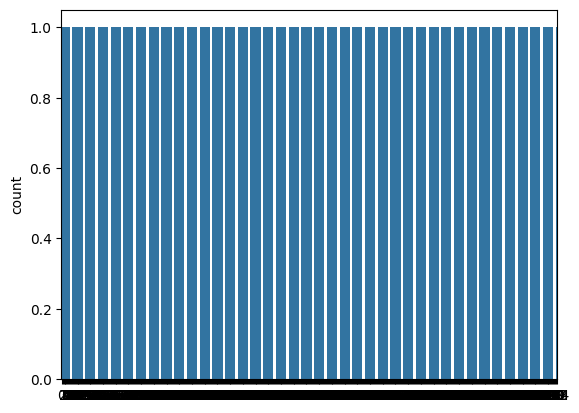

In [10]:
sns.countplot(df['Label'])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [13]:
Y_test

458    2
235    3
281    0
55     4
284    2
      ..
355    5
392    5
162    4
283    1
499    2
Name: Label, Length: 107, dtype: int64

In [14]:
type(Y_test)

pandas.core.series.Series

In [15]:
#Check unique values for y_train
Y_train.unique()

array([2, 6, 5, 0, 4, 1, 3])

In [16]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6])

In [17]:
Y_test.unique()

array([2, 3, 0, 4, 5, 6, 1])

In [18]:
np.unique(Y_test)

array([0, 1, 2, 3, 4, 5, 6])

In [19]:
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(Y_train),
                                        y = Y_train
                                    )
class_weights = dict(zip(np.unique(Y_train), class_weights))
class_weights

{0: 1.1116883116883116,
 1: 0.9705215419501134,
 2: 0.5661375661375662,
 3: 1.2478134110787171,
 4: 1.1116883116883116,
 5: 0.9705215419501134,
 6: 1.7469387755102042}

In [20]:
from sklearn.preprocessing import StandardScaler
#Normalize the data
scaler = StandardScaler()
scaler.fit(x_train)
X_train_scalled = scaler.transform(x_train)
X_test_scalled = scaler.transform(x_test)

In [21]:
#Add dimension for CNN
x_traincnn = np.expand_dims(X_train_scalled, axis=2)
x_testcnn = np.expand_dims(X_test_scalled, axis=2)

#Check shapes of dataframes
print(x_traincnn.shape)
print(x_testcnn.shape)

(428, 40, 1)
(107, 40, 1)


In [22]:
#Import packages for CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Conv1D
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, BatchNormalization, Flatten, MaxPooling1D
from tensorflow.keras.layers import LeakyReLU
from keras.regularizers import l2


In [23]:
(x_train.shape[1], 1)

(40, 1)

In [24]:
ANN_model = Sequential()

ANN_model.add(Dense(999,input_shape=(X_train_scalled.shape[1],),activation='elu')),
ANN_model.add(BatchNormalization()),
ANN_model.add(Dropout(0.1)),
#LAYER1
ANN_model.add(Dense(785,activation='elu')),
#kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01),
#kernel_regularizer=l2(0.001)
ANN_model.add(BatchNormalization()),
ANN_model.add(Dropout(0.2)),

#LAYER2
ANN_model.add(Dense(865,activation='elu')),
#kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01),
ANN_model.add(BatchNormalization()),
ANN_model.add(Dropout(0.2)),

#LAYER3
ANN_model.add(Dense(672,activation='elu')),
#kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01),
ANN_model.add(BatchNormalization()),
ANN_model.add(Dropout(0.3)),
ANN_model.add(Dense(7,activation='softmax')),
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 999)               40959     
                                                                 
 batch_normalization (Batch  (None, 999)               3996      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 999)               0         
                                                                 
 dense_1 (Dense)             (None, 785)               785000    
                                                                 
 batch_normalization_1 (Bat  (None, 785)               3140      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 785)               0

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import os
import tempfile
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
ANN_model.save_weights(initial_weights)

In [27]:
ANN_model.load_weights(initial_weights)

In [28]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
ANN_model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',                             #CategoricalCrossentropy
              metrics=['SparseCategoricalAccuracy'])
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 999)               40959     
                                                                 
 batch_normalization (Batch  (None, 999)               3996      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 999)               0         
                                                                 
 dense_1 (Dense)             (None, 785)               785000    
                                                                 
 batch_normalization_1 (Bat  (None, 785)               3140      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 785)               0

In [29]:
checkpoint_path='cnn_lstm_emodb3.ckpt'
checkpoint_dir=os.path.dirname(checkpoint_path)
callback1=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, monitor='val_sparse_categorical_accuracy', verbose=1,
   save_best_only=True,save_weights_only=True,)
callback2=tf.keras.callbacks.EarlyStopping(monitor='val_sparse_categorical_accuracy',min_delta=0, patience=50, verbose=0, mode='auto',baseline=None,restore_best_weights=True)
cp_callback=[callback1,callback2]

In [30]:
history = ANN_model.fit(x_traincnn, Y_train, validation_data=(x_testcnn, Y_test), batch_size=64, epochs=600, verbose=1,class_weight=class_weights,callbacks=cp_callback)

Epoch 1/600
1/7 [===>..........................] - ETA: 36s - loss: 2.8228 - sparse_categorical_accuracy: 0.1562
Epoch 1: val_sparse_categorical_accuracy improved from -inf to 0.54206, saving model to cnn_lstm_emodb3.ckpt
7/7 [==============================] - 7s 76ms/step - loss: 1.9800 - sparse_categorical_accuracy: 0.3551 - val_loss: 1.3398 - val_sparse_categorical_accuracy: 0.5421
Epoch 2/600
1/7 [===>..........................] - ETA: 0s - loss: 1.3064 - sparse_categorical_accuracy: 0.4844
Epoch 2: val_sparse_categorical_accuracy improved from 0.54206 to 0.57944, saving model to cnn_lstm_emodb3.ckpt
7/7 [==============================] - 0s 33ms/step - loss: 1.2594 - sparse_categorical_accuracy: 0.5280 - val_loss: 1.1560 - val_sparse_categorical_accuracy: 0.5794
Epoch 3/600
1/7 [===>..........................] - ETA: 0s - loss: 0.9425 - sparse_categorical_accuracy: 0.6406
Epoch 3: val_sparse_categorical_accuracy improved from 0.57944 to 0.65421, saving model to cnn_lstm_emodb3.ckp

In [31]:
ANN_model.load_weights(checkpoint_path) #to load model with highest accuracy

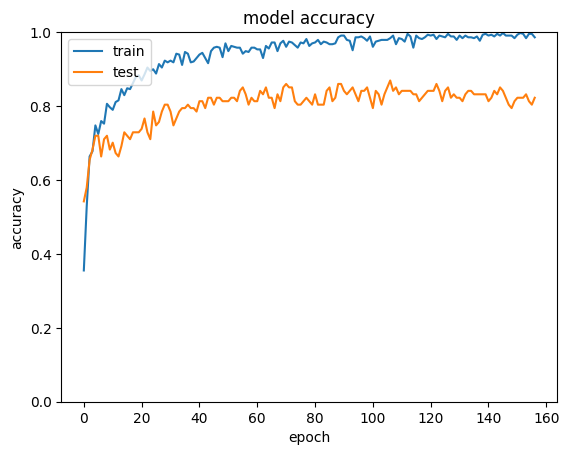

In [32]:
#Plot model accuracy over ephocs
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.ylim(0, 1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
# Calculate pre-training accuracy
score = ANN_model.evaluate(x_testcnn, Y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

4/4 [==============================] - 0s 12ms/step - loss: 0.8033 - sparse_categorical_accuracy: 0.8692
Pre-training accuracy: 86.9159%


In [34]:
# Evaluating the model on the training and testing set
score = ANN_model.evaluate(x_traincnn, Y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = ANN_model.evaluate(x_testcnn, Y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  1.0
Testing Accuracy:  0.8691588640213013


In [35]:
#Get predictions from model
y_test_predictions = ANN_model.predict(x_testcnn) # it will give the prediction data of the model

4/4 [==============================] - 0s 4ms/step


In [36]:
y_test_predictions.shape

(107, 7)

In [37]:
y_test_predictions

array([[2.05414722e-06, 7.50622785e-05, 9.90843058e-01, 9.44150145e-08,
        8.94588325e-03, 7.44657336e-10, 1.33814261e-04],
       [1.80562574e-06, 8.79309810e-05, 2.46830612e-10, 9.99497890e-01,
        3.89675904e-07, 4.11701156e-04, 2.28657612e-07],
       [9.70820010e-01, 7.17730708e-10, 2.86868215e-02, 3.99654573e-06,
        2.95946393e-07, 1.98077710e-09, 4.88933001e-04],
       [1.55377595e-04, 4.35092574e-07, 7.05638994e-03, 7.86025776e-05,
        9.92627800e-01, 1.67810976e-09, 8.13965453e-05],
       [2.50314176e-02, 5.12412335e-09, 9.73230422e-01, 1.61453897e-07,
        1.29706123e-07, 8.32635294e-09, 1.73791090e-03],
       [7.27774901e-03, 2.73440255e-05, 6.45918190e-01, 5.58275701e-07,
        3.35759789e-01, 8.35766834e-09, 1.10163968e-02],
       [7.28818161e-09, 3.97467084e-04, 4.58845850e-10, 9.97909069e-01,
        5.11849339e-06, 1.68733543e-03, 1.04144613e-06],
       [5.72194722e-07, 6.71289116e-02, 6.29969727e-05, 3.45820677e-04,
        1.32945017e-04, 9

In [38]:
y_test_predictions=np.argmax(y_test_predictions,axis=1)

In [39]:
y_test_predictions

array([2, 3, 0, 4, 2, 2, 3, 5, 4, 3, 6, 1, 0, 3, 1, 3, 6, 1, 4, 4, 2, 1,
       4, 6, 5, 2, 2, 3, 6, 0, 5, 1, 1, 0, 4, 1, 0, 1, 2, 2, 2, 2, 4, 1,
       5, 0, 6, 1, 5, 3, 1, 1, 5, 6, 2, 5, 0, 2, 5, 1, 1, 4, 4, 6, 3, 3,
       0, 3, 1, 1, 3, 5, 5, 0, 2, 1, 0, 2, 4, 4, 3, 4, 5, 0, 6, 6, 5, 4,
       0, 3, 2, 2, 5, 2, 0, 3, 2, 0, 6, 3, 4, 6, 5, 5, 4, 1, 0])

In [40]:
#df.replace({ 'neutral': 0, 'calm': 1,'happy': 2,'sad': 3, 'angry':4,'fearful':5,'disgust':6,'surprised':7}, inplace=True)

In [41]:
emotions={
 0: 'happyness',
 1: 'neutral',
 2: 'anger',
 3: 'sadness',
 4: 'fear',
 5: 'boredom',
 6: 'disgust',
}

In [42]:
label=[]
for i in y_test_predictions:
    label1=emotions[i]
    label.append(label1)
label
y_pred_acc=np.array(label)

In [43]:
y_pred_acc

array(['anger', 'sadness', 'happyness', 'fear', 'anger', 'anger',
       'sadness', 'boredom', 'fear', 'sadness', 'disgust', 'neutral',
       'happyness', 'sadness', 'neutral', 'sadness', 'disgust', 'neutral',
       'fear', 'fear', 'anger', 'neutral', 'fear', 'disgust', 'boredom',
       'anger', 'anger', 'sadness', 'disgust', 'happyness', 'boredom',
       'neutral', 'neutral', 'happyness', 'fear', 'neutral', 'happyness',
       'neutral', 'anger', 'anger', 'anger', 'anger', 'fear', 'neutral',
       'boredom', 'happyness', 'disgust', 'neutral', 'boredom', 'sadness',
       'neutral', 'neutral', 'boredom', 'disgust', 'anger', 'boredom',
       'happyness', 'anger', 'boredom', 'neutral', 'neutral', 'fear',
       'fear', 'disgust', 'sadness', 'sadness', 'happyness', 'sadness',
       'neutral', 'neutral', 'sadness', 'boredom', 'boredom', 'happyness',
       'anger', 'neutral', 'happyness', 'anger', 'fear', 'fear',
       'sadness', 'fear', 'boredom', 'happyness', 'disgust', 'disgust'

In [44]:
Y_test

458    2
235    3
281    0
55     4
284    2
      ..
355    5
392    5
162    4
283    1
499    2
Name: Label, Length: 107, dtype: int64

In [45]:
#df.replace({ 'neutral': 0, 'calm': 1,'happy': 2,'sad': 3, 'angry':4,'fearful':5,'disgust':6,'surprised':7}, inplace=True)

In [46]:
emotion={
 0: 'happyness',
 1: 'neutral',
 2: 'anger',
 3: 'sadness',
 4: 'fear',
 5: 'boredom',
 6: 'disgust',
}

In [47]:
emotion[0]

'happyness'

In [48]:
label_test=[]
for i in Y_test:
    label_test.append(emotion[i])
label_test
y_true_accu=np.array(label_test)


In [49]:
y_true_accu

array(['anger', 'sadness', 'happyness', 'fear', 'anger', 'happyness',
       'sadness', 'boredom', 'fear', 'sadness', 'disgust', 'neutral',
       'happyness', 'happyness', 'neutral', 'sadness', 'anger', 'neutral',
       'fear', 'fear', 'anger', 'boredom', 'boredom', 'disgust',
       'boredom', 'anger', 'anger', 'sadness', 'disgust', 'happyness',
       'boredom', 'neutral', 'boredom', 'anger', 'fear', 'neutral',
       'happyness', 'neutral', 'anger', 'happyness', 'anger', 'happyness',
       'fear', 'neutral', 'boredom', 'happyness', 'disgust', 'neutral',
       'boredom', 'sadness', 'neutral', 'neutral', 'boredom', 'disgust',
       'anger', 'boredom', 'happyness', 'anger', 'boredom', 'neutral',
       'neutral', 'fear', 'fear', 'disgust', 'sadness', 'sadness',
       'happyness', 'sadness', 'neutral', 'neutral', 'sadness', 'boredom',
       'boredom', 'happyness', 'anger', 'neutral', 'happyness', 'anger',
       'fear', 'fear', 'disgust', 'fear', 'boredom', 'happyness',
       'd

In [50]:
#DataFlair - Calculate the accuracy of our model
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_true=y_true_accu, y_pred=y_pred_acc)

#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 86.92%


In [51]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true=y_true_accu, y_pred=y_pred_acc)

In [52]:
print(cm)

[[15  0  1  0  3  0  0]
 [ 0 15  0  1  0  2  0]
 [ 0  0 10  0  0  0  1]
 [ 0  0  0 13  1  0  0]
 [ 3  0  0  1 11  0  1]
 [ 0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0 13]]


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_true_accu,y_pred_acc))

              precision    recall  f1-score   support

       anger       0.83      0.79      0.81        19
     boredom       1.00      0.83      0.91        18
     disgust       0.91      0.91      0.91        11
        fear       0.87      0.93      0.90        14
   happyness       0.73      0.69      0.71        16
     neutral       0.89      1.00      0.94        16
     sadness       0.87      1.00      0.93        13

    accuracy                           0.87       107
   macro avg       0.87      0.88      0.87       107
weighted avg       0.87      0.87      0.87       107

